In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7f749b51abf264fe4eb064d78a012b0


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | tasiilaq
Processing Record 2 of Set 13 | leningradskiy
Processing Record 3 of Set 13 | provideniya
Processing Record 4 of Set 13 | barrow
Processing Record 5 of Set 13 | arraial do cabo
Processing Record 6 of Set 13 | volkhov
Processing Record 7 of Set 13 | alto araguaia
Processing Record 8 of Set 13 | vaini
Processing Record 9 of Set 13 | mar del plata
Processing Record 10 of Set 13 | thompson
Processing Record 11 of Set 13 | khatanga
Processing Record 12 of Set 13 | punta arenas
Processing Record 13 of Set 13 | port elizabeth
Processing Record 14 of Set 13 | praia
Processing Record 15 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 13 | mataura
Processing Record 17 of Set 13 | te anau
Processing Record 18 of Set 13 | namibe
Processing Record 19 of Set 13 | cape town
Processing Record 20 of Set 13 | cuiluan
Processing Record 21 of Set 13 | iquique
Processing Record 2

Processing Record 34 of Set 16 | virginia beach
Processing Record 35 of Set 16 | lata
Processing Record 36 of Set 16 | lamu
Processing Record 37 of Set 16 | san patricio
Processing Record 38 of Set 16 | baraki barak
Processing Record 39 of Set 16 | ca mau
Processing Record 40 of Set 16 | hasaki
Processing Record 41 of Set 16 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 16 | asau
Processing Record 43 of Set 16 | ajtos
Processing Record 44 of Set 16 | dargaville
Processing Record 45 of Set 16 | karratha
Processing Record 46 of Set 16 | moron
Processing Record 47 of Set 16 | vester hassing
Processing Record 48 of Set 16 | dire dawa
Processing Record 49 of Set 16 | susuman
Processing Record 50 of Set 16 | taga
Processing Record 1 of Set 17 | saint-pascal
City not found. Skipping...
Processing Record 2 of Set 17 | new norfolk
Processing Record 3 of Set 17 | pathein
Processing Record 4 of Set 17 | pevek
Processing Record 5 of Set 17 | nome
Processing Record 6 of Set 17

Processing Record 16 of Set 20 | assiniboia
Processing Record 17 of Set 20 | tela
Processing Record 18 of Set 20 | baruun-urt
Processing Record 19 of Set 20 | palmer
Processing Record 20 of Set 20 | susaki
Processing Record 21 of Set 20 | lavrentiya
Processing Record 22 of Set 20 | bunia
Processing Record 23 of Set 20 | kamiiso
Processing Record 24 of Set 20 | shache
Processing Record 25 of Set 20 | poum
Processing Record 26 of Set 20 | fare
Processing Record 27 of Set 20 | naze
Processing Record 28 of Set 20 | lotofaga
Processing Record 29 of Set 20 | waingapu
Processing Record 30 of Set 20 | cayenne
Processing Record 31 of Set 20 | leh
Processing Record 32 of Set 20 | washougal
Processing Record 33 of Set 20 | straumen
Processing Record 34 of Set 20 | chicama
Processing Record 35 of Set 20 | springdale
Processing Record 36 of Set 20 | port arthur
Processing Record 37 of Set 20 | troy
Processing Record 38 of Set 20 | neuquen
Processing Record 39 of Set 20 | mackay
Processing Record 40

Processing Record 6 of Set 24 | baisha
Processing Record 7 of Set 24 | ovsyanka
Processing Record 8 of Set 24 | belinskiy
Processing Record 9 of Set 24 | flores
Processing Record 10 of Set 24 | manono
Processing Record 11 of Set 24 | irbil
Processing Record 12 of Set 24 | qabis
City not found. Skipping...
Processing Record 13 of Set 24 | ostrovnoy
Processing Record 14 of Set 24 | groton
Processing Record 15 of Set 24 | morro bay
Processing Record 16 of Set 24 | grenaa
Processing Record 17 of Set 24 | requena
Processing Record 18 of Set 24 | manali
Processing Record 19 of Set 24 | sitka
Processing Record 20 of Set 24 | ulladulla
Processing Record 21 of Set 24 | anyang
Processing Record 22 of Set 24 | keffi
Processing Record 23 of Set 24 | gigmoto
Processing Record 24 of Set 24 | goderich
Processing Record 25 of Set 24 | kaupanger
Processing Record 26 of Set 24 | juneau
Processing Record 27 of Set 24 | kristinehamn
Processing Record 28 of Set 24 | nioro
Processing Record 29 of Set 24 | b

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,15.96,86,60,3.94,GL,2022-04-10 23:14:16
1,Leningradskiy,69.3833,178.4167,0.28,89,70,4.97,RU,2022-04-10 23:14:17
2,Provideniya,64.3833,-173.3000,26.71,80,100,8.99,RU,2022-04-10 23:14:03
3,Barrow,71.2906,-156.7887,1.42,71,100,18.41,US,2022-04-10 23:14:17
4,Arraial Do Cabo,-22.9661,-42.0278,75.88,81,51,6.96,BR,2022-04-10 23:14:17
5,Volkhov,59.9258,32.3382,33.85,89,8,8.34,RU,2022-04-10 23:14:18
6,Alto Araguaia,-17.3147,-53.2153,76.01,73,66,2.57,BR,2022-04-10 23:14:18
7,Vaini,-21.2000,-175.2000,78.96,89,75,6.91,TO,2022-04-10 23:14:19
8,Mar Del Plata,-38.0023,-57.5575,70.09,97,100,20.00,AR,2022-04-10 23:11:36
9,Thompson,55.7435,-97.8558,35.76,75,75,10.36,CA,2022-04-10 23:14:19


In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
weather_data_df = city_data_df[new_column_order]
weather_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-04-10 23:14:16,65.6145,-37.6368,15.96,86,60,3.94
1,Leningradskiy,RU,2022-04-10 23:14:17,69.3833,178.4167,0.28,89,70,4.97
2,Provideniya,RU,2022-04-10 23:14:03,64.3833,-173.3000,26.71,80,100,8.99
3,Barrow,US,2022-04-10 23:14:17,71.2906,-156.7887,1.42,71,100,18.41
4,Arraial Do Cabo,BR,2022-04-10 23:14:17,-22.9661,-42.0278,75.88,81,51,6.96
5,Volkhov,RU,2022-04-10 23:14:18,59.9258,32.3382,33.85,89,8,8.34
6,Alto Araguaia,BR,2022-04-10 23:14:18,-17.3147,-53.2153,76.01,73,66,2.57
7,Vaini,TO,2022-04-10 23:14:19,-21.2000,-175.2000,78.96,89,75,6.91
8,Mar Del Plata,AR,2022-04-10 23:11:36,-38.0023,-57.5575,70.09,97,100,20.00
9,Thompson,CA,2022-04-10 23:14:19,55.7435,-97.8558,35.76,75,75,10.36


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

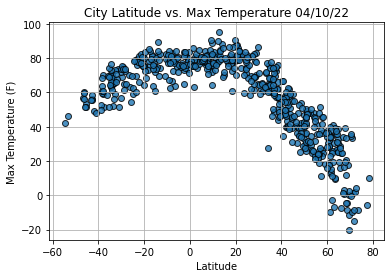

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

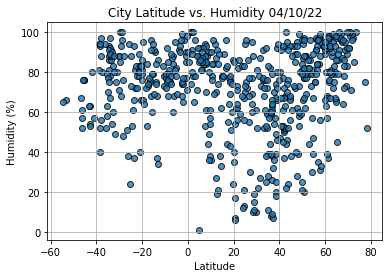

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

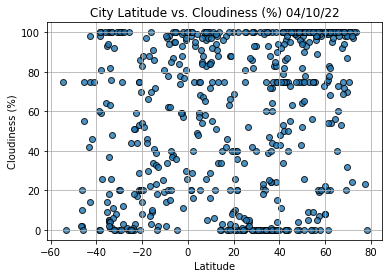

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

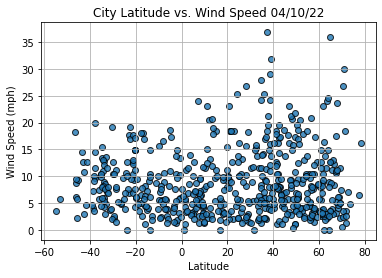

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City                        Praia
Lat                       14.9215
Lng                      -23.5087
Max Temp                    70.34
Humidity                       78
Cloudiness                     40
Wind Speed                  18.41
Country                        CV
Date          2022-04-10 23:14:21
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
575    False
576     True
577     True
578     True
579    False
Name: Lat, Length: 580, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,15.96,86,60,3.94,GL,2022-04-10 23:14:16
1,Leningradskiy,69.3833,178.4167,0.28,89,70,4.97,RU,2022-04-10 23:14:17
2,Provideniya,64.3833,-173.3000,26.71,80,100,8.99,RU,2022-04-10 23:14:03
3,Barrow,71.2906,-156.7887,1.42,71,100,18.41,US,2022-04-10 23:14:17
5,Volkhov,59.9258,32.3382,33.85,89,8,8.34,RU,2022-04-10 23:14:18


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

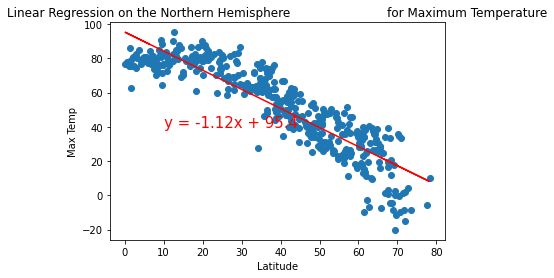

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

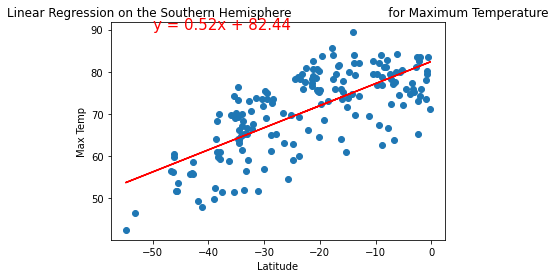

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

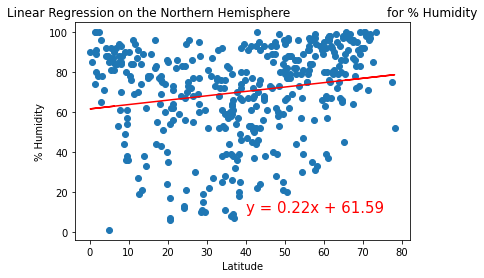

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

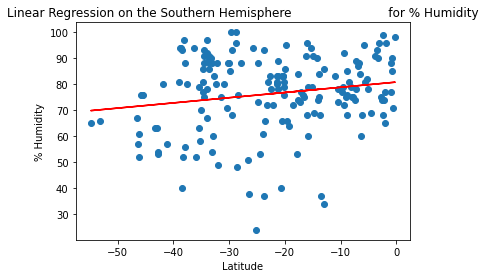

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

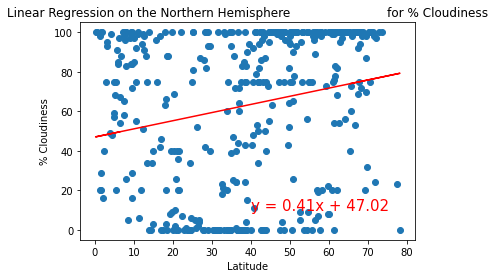

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

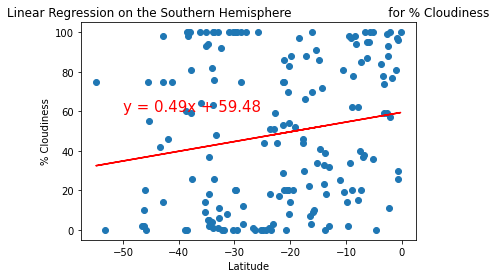

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

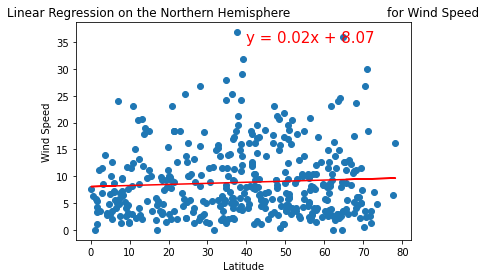

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

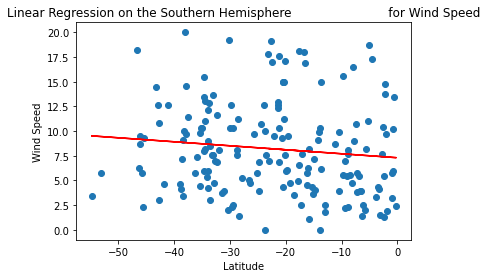

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))